# Distribution of AirBnB Prices based on a Variety of Factors:
### Rating, Construction Year, Host Verification, Cancellation Policy, Room Type, Best/Worst Rated + Room Type 

#### Do different booking parameters appear to have an effect on price?


#### Price by Review Rating
AirBnB property ratings are an effective tool to determine the likeliness of a pleasant AirBnB stay.  Boxplots were constructed to help visualize if "Price" changes depending on the "Rating" of a property.  
Question: Are better rated properties more expensive in general? 
Conclusion: The boxplots show no obvious relationship between "Ratings" and "Price".  Ratings and Price would be a difficult relationship to define.  Ratings are based on expectations and expectations can be based on price.  You may have higher expectations on a expensive property, therefore be more critical in the ratings.

#### Price by Host Verification, for Whole Dataset  and Top Rated Properties
Host verification helps provides an initial level of trust in a host's listing.  Currently policy is that all hosts and guests are verified, but this dataset must have been acquired prior to this policy implementation.  There is an approximate 50/50 split of verified and unconfirmed in this dataset.  
Boxplots were constructed to help visualize if "Price" changes depending on if the host is verified.
Question: Do properties with verified Hosts charge more than unverified hosts? 
Conclusion: Sets of Boxplots for the Whole Dataset and a population of Top Rated Properties both show no obvious relationship between "Host Verification" and "Price".

#### Price by Cancellation Policy, for Whole Dataset and Top Rated Properties
AirBnB provides a range of cancellation policies from strict to flexible.  A Host may desire the security of a more strict policy, whereas a guest may prefer a more flexible cancellation policy for vacation changes. 
Boxplots were constructed to visualize if "Price" changes based on cancellation policy.
Question: Do prices decrease with a more strict cancellation policy?
Conclusion: The boxplots show no obvious relationship between "Cancellation Policy" and "Price". ***? t-test for flexible vs strict  its only 3% more

#### Price by Construction Year 
Question:  Do newer builds charge more for AirBnB rentals?  
Conclusion: The boxplots show no obvious trend in "Price" based on "Construction Year".

#### Price by Room Type
Within the 4 Room Type Categories there are variations in size of property, privacy, and amenities.  When just considering property type, more privacy and and a larger size may be able to charge more. 
Question: Do different room types typically charge more for their property?
Conclusion: Location may be a confounding factor to price. ***? should i be adding a neighbourhood group to reduce variables when comparing price? concentrate on manhattan

#### Price by Room Type with Guest Centric Metrics: Rated 5, Verified Host, Flexible Cancellation Policy

In [1]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import cleaned_airbnb_data.csv
filepath = Path("Resources\cleaned_airbnb_data.csv")
airbnb_df = pd.read_csv(filepath)

In [3]:
airbnb_df_sl = airbnb_df
# Changing Review Rate Number to integer
airbnb_df_sl = airbnb_df_sl.astype({'review rate number': "int64"})
# change 'Construction year' from float to int
airbnb_df_sl = airbnb_df_sl.astype({'Construction year': "int64"})

In [4]:
# Defining a function to create a boxplot and summary statistics DataFrame based on two columns
def makebp_sl(x,y):
    # Setting up an empty list that will hold the loc data
    bp_data_sl = []
    
    # Defining what values will be used to define the boxplot on x-axis
    categories_sl = airbnb_df_sl[x].unique()
    categories_sorted_sl = np.sort(categories_sl)
    num_sl = len(categories_sorted_sl)
    
    # Setting up empty lists for summary statistics
    length_list_sl = []
    median_list_sl = []
    mean_list_sl = []
    min_list_sl = []
    max_list_sl = []
    
    # Finding the data according to x and y variables, and appending to bp_data_sl
    for z in range(num_sl):
        category_data_sl = airbnb_df_sl.loc[airbnb_df_sl[x] == categories_sorted_sl[z], [y]]
        bp_data_sl.append(category_data_sl)
        
        # Determining how many values per x-axis category
        length_sl = int(bp_data_sl[z].count())
        length_list_sl.append(length_sl)
        
        # If there are found values, they will be used for summary statistics calculations
        if length_sl > 0:
            median_sl = int(bp_data_sl[z].median())    
            mean_sl = int(bp_data_sl[z].mean())
            mini_sl = int(bp_data_sl[z].min())
            maxi_sl = int(bp_data_sl[z].max())
        
        # If there are no values for the category, statistics will be set to 0
        else:
            median_sl = 0
            mean_sl = 0
            mini_sl= 0
            maxi_sl= 0
        
        # Adding the summary statistics into lists
        median_list_sl.append(median_sl)
        mean_list_sl.append(mean_sl)
        min_list_sl.append(mini_sl)
        max_list_sl.append(maxi_sl)
    
    # Making summary statistics DataFrame and setting index label
    summary_df_sl = pd.DataFrame({"Property Count":length_list_sl, "Median": median_list_sl, 
                               "Mean":mean_list_sl, "Minimum":min_list_sl, "Maximum":max_list_sl})
    summary_df_sl.index = [categories_sorted_sl]
    summary_df_sl = summary_df_sl.rename_axis(x)
    display(summary_df_sl)
    
    # Plotting the boxplots
    j=1
    for k in range(num_sl):
        y_val_sl = bp_data_sl[k]
        plt.boxplot(y_val_sl, positions=[j], widths=0.6)
        j=j+1
    plt.ylabel(y)
    plt.xlabel(x)
    x_axis = np.arange(1,(num_sl+1),1)
    plt.xticks(x_axis, categories_sorted_sl)
    plt.show

In [5]:
# Defining a function to create a boxplot and summary statistics DataFrame based on three columns and one variable
def makebp_4var_sl(t, u, v, w, x, y):
    # Setting up an empty list that will hold the loc data
    bp_data_sl = []
    
    # Defining what values will be used to define the boxplot on x-axis
    categories_sl = airbnb_df_sl[x].unique()
    categories_sorted_sl = np.sort(categories_sl)
    
    # Setting up empty lists for summary statistics
    num_sl = len(categories_sorted_sl)
    length_list_sl = []
    median_list_sl = []
    mean_list_sl = []
    min_list_sl = []
    max_list_sl = []
    
    # Finding the data according to x and y variables, and appending to bp_data
    for z in range(num_sl):
        category_data_sl = airbnb_df_sl.loc[(airbnb_df_sl[x] == categories_sorted_sl[z]) & 
                                            (airbnb_df_sl[v] == w) &
                                            (airbnb_df_sl[t] == u), [y]]
        bp_data_sl.append(category_data_sl)
        
        # Determining how many values per x-axis category
        length_sl = int(bp_data_sl[z].count())
        length_list_sl.append(length_sl)
        
        # If there are found values, they will be used for summary statistics calculations
        if length_sl > 0:
            median_sl = int(bp_data_sl[z].median())    
            mean_sl = int(bp_data_sl[z].mean())
            mini_sl = int(bp_data_sl[z].min())
            maxi_sl = int(bp_data_sl[z].max())
        
        # If there are no values for the category, statistics will be set to 0
        else:
            median_sl = 0
            mean_sl = 0
            mini_sl=0
            maxi_sl=0
            
        # Adding the summary statistics into lists    
        median_list_sl.append(median_sl)
        mean_list_sl.append(mean_sl)
        min_list_sl.append(mini_sl)
        max_list_sl.append(maxi_sl)
    
    # Making summary statistics DataFrame and setting index label    
    summary_df_sl = pd.DataFrame({"Property Count":length_list_sl, "Median": median_list_sl, 
                               "Mean":mean_list_sl, "Minimum":min_list_sl, "Maximum":max_list_sl})
    summary_df_sl.index = [categories_sorted_sl]
    summary_df_sl = summary_df_sl.rename_axis(x)
    display(summary_df_sl)
    
    # Plotting boxplot
    j=1
    for k in range(num_sl):
        y_val_sl = bp_data_sl[k]
        plt.boxplot(y_val_sl, positions=[j], widths=0.6)
        
        #Sets position for next boxplot
        j=j+1
    plt.ylabel(y)
    plt.xlabel(x)
    x_axis = np.arange(1,(num_sl+1),1)
    plt.xticks(x_axis, categories_sorted_sl)
    plt.show

In [6]:
# Defining a function to create a boxplot and summary statistics DataFrame based on three columns and one variable with added Scatter plot
def makebp_4var_scatter_sl(t,u,v, w, x, y):
    # Setting up an empty list that will hold the loc data
    bp_data_sl = []
    
    # Defining what values will be used to define the boxplot on x-axis
    categories_sl = airbnb_df_sl[x].unique()
    categories_sorted_sl = np.sort(categories_sl)
    
    # Setting up empty lists for summary statistics
    num_sl = len(categories_sorted_sl)
    length_list_sl = []
    median_list_sl = []
    mean_list_sl = []
    min_list_sl = []
    max_list_sl = []
    
    # Finding the data according to x and y variables, and appending to bp_data
    for z in range(num_sl):
        category_data_sl = airbnb_df_sl.loc[(airbnb_df_sl[x] == categories_sorted_sl[z]) &
                                            (airbnb_df_sl[v] == w) &
                                            (airbnb_df_sl[t] == u), [y]]
        bp_data_sl.append(category_data_sl)
        
        # Determining how many values per x-axis category
        length_sl = int(bp_data_sl[z].count())
        length_list_sl.append(length_sl)
        
        # If there are found values, they will be used for summary statistics calculations
        if length_sl > 0:
            median_sl = int(bp_data_sl[z].median())    
            mean_sl = int(bp_data_sl[z].mean())
            mini_sl = int(bp_data_sl[z].min())
            maxi_sl = int(bp_data_sl[z].max())
        
        # If there are no values for the category, statistics will be set to 0
        else:
            median_sl = 0
            mean_sl = 0
            mini_sl=0
            maxi_sl=0
            
        # Adding the summary statistics into lists    
        median_list_sl.append(median_sl)
        mean_list_sl.append(mean_sl)
        min_list_sl.append(mini_sl)
        max_list_sl.append(maxi_sl)
    
    # Making summary statistics DataFrame and setting index label    
    summary_df_sl = pd.DataFrame({"Property Count":length_list_sl, "Median": median_list_sl, 
                               "Mean":mean_list_sl, "Minimum":min_list_sl, "Maximum":max_list_sl})
    summary_df_sl.index = [categories_sorted_sl]
    summary_df_sl = summary_df_sl.rename_axis(x)
    display(summary_df_sl)
    
    # Plotting boxplot and scatter
    j=1
    for k in range(num_sl):
        y_val_sl = bp_data_sl[k]
        
        # Setting variable for scatter plot overlay
        x_val_sl = np.random.normal(k + 1, 0.08, len(y_val_sl))
        
        # Making boxplots with scatter overlay
        plt.boxplot(y_val_sl, positions=[j], widths=0.6)
        plt.scatter(x_val_sl,y_val_sl, alpha=0.5)
        
        #Sets position for next boxplot
        j=j+1
    plt.ylabel(y)
    plt.xlabel(x)
    x_axis = np.arange(1,(num_sl+1),1)
    plt.xticks(x_axis, categories_sorted_sl)
    plt.show

,Property Count,Median,Mean,Minimum,Maximum
review rate number,,,,,
1,7019,637,631,50,1200
2,18684,632,629,50,1200
3,18794,628,625,50,1200
4,18817,625,626,50,1200
5,18792,618,622,50,1200


Text(0.5, 1.0, 'Price by Review Rating')

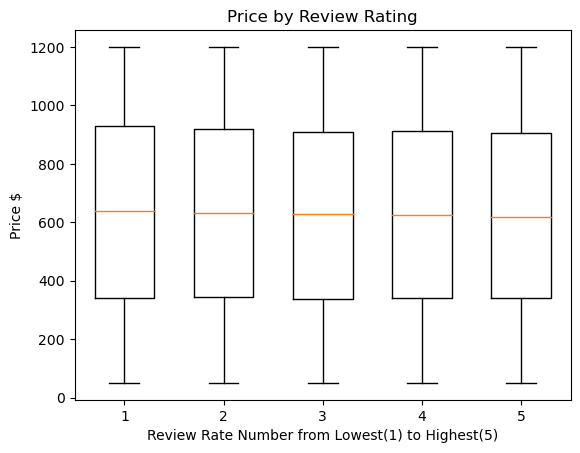

In [7]:
# Price by Review Rating

# Defining the Variables
x = 'review rate number'
y = 'price'

# Making Summary Statistics Table and BoxPlots utilizing makebp function
makebp_sl(x,y)
plt.ylabel("Price $")
plt.xlabel("Review Rate Number from Lowest(1) to Highest(5)")
plt.title("Price by Review Rating")

,Property Count,Median,Mean,Minimum,Maximum
host_identity_verified,,,,,
unconfirmed,3834,614,617,50,1200
verified,3954,595,608,50,1199


Text(0.5, 1.0, 'Top Rated Properties - Price by Host Verification Status in Manhattan')

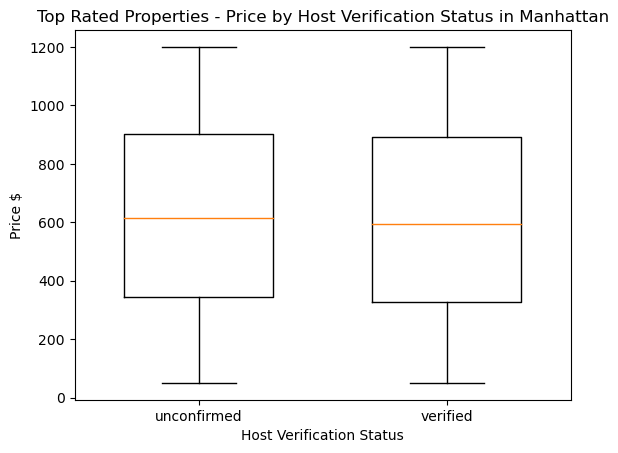

In [8]:
# Top Rated Properties - Price by Verification Status

# Defining the Variables
t= "neighbourhood group"
u = "Manhattan"
v = "review rate number"
w = 5
x = "host_identity_verified"
y = "price"

# Making Summary Statistics Table and BoxPlots utilizing makebp_4var_sl function 
makebp_4var_sl(t,u,v,w,x,y)
plt.ylabel("Price $")
plt.xlabel("Host Verification Status")
plt.title("Top Rated Properties - Price by Host Verification Status in Manhattan")

,Property Count,Median,Mean,Minimum,Maximum
host_identity_verified,,,,,
unconfirmed,41062,627,627,50,1200
verified,41044,625,626,50,1200


Text(0.5, 1.0, 'Price by Host Verification Status')

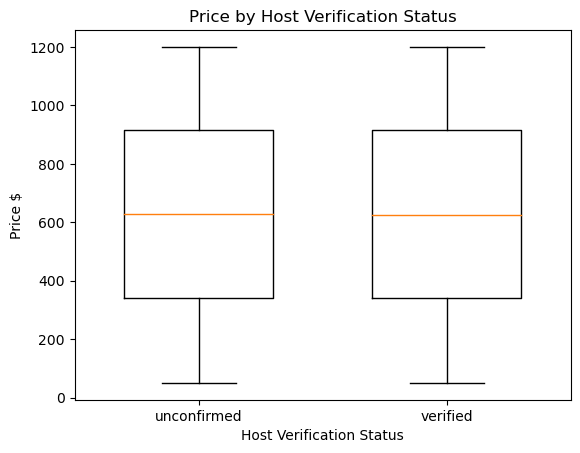

In [9]:
# Price by Host Verification

# Defining the Variables
x = 'host_identity_verified'
y = 'price'

# Making Summary Statistics Table and BoxPlots utilizing makebp_sl function
makebp_sl(x,y)
plt.ylabel("Price $")
plt.xlabel("Host Verification Status")
plt.title("Price by Host Verification Status")

,Property Count,Median,Mean,Minimum,Maximum
cancellation_policy,,,,,
flexible,2556,608,609,50,1197
moderate,2632,614,625,50,1200
strict,2600,590,603,50,1199


Text(0.5, 1.0, 'Top Rated - Price by Cancellation Policy in Manhattan')

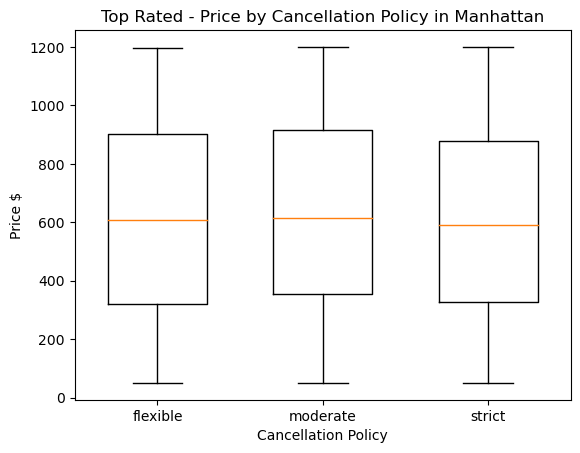

In [10]:
# Top Rated Properties - Price by Cancellation Policy

# Defining the Variables
t= "neighbourhood group"
u = "Manhattan"
v = "review rate number"
w = 5
x = "cancellation_policy"
y = "price"

# Making Summary Statistics Table and BoxPlots utilizing makebp_4var_sl function
makebp_4var_sl(t,u,v,w,x,y)
plt.ylabel("Price $")
plt.xlabel("Cancellation Policy")
plt.title("Top Rated - Price by Cancellation Policy in Manhattan")

,Property Count,Median,Mean,Minimum,Maximum
cancellation_policy,,,,,
flexible,27291,629,628,50,1200
moderate,27479,622,625,50,1200
strict,27336,628,626,50,1200


Text(0.5, 1.0, 'Price by Cancellation Policy')

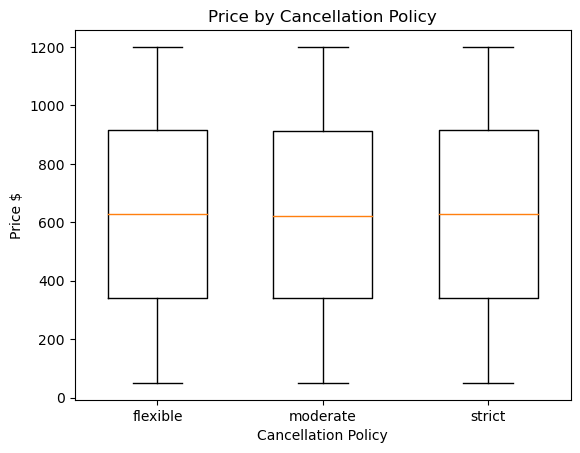

In [11]:
# Price by Cancellation Policy

# Defining the Variables
x = 'cancellation_policy'
y = 'price'

# Making Summary Statistics Table and BoxPlots utilizing makebp_sl function
makebp_sl(x,y)
plt.ylabel("Price $")
plt.xlabel("Cancellation Policy")
plt.title("Price by Cancellation Policy")

,Property Count,Median,Mean,Minimum,Maximum
Construction year,,,,,
2003,401,540,581,57,1189
2004,412,622,629,55,1194
2005,370,574,595,52,1197
2006,415,605,617,52,1198
2007,388,594,598,50,1196
2008,416,679,635,57,1196
2009,359,621,619,57,1194
2010,398,578,598,62,1196
2011,431,617,627,57,1192


Text(0.5, 1.0, 'Top Rated - Price by Construction Year in Manhattan')

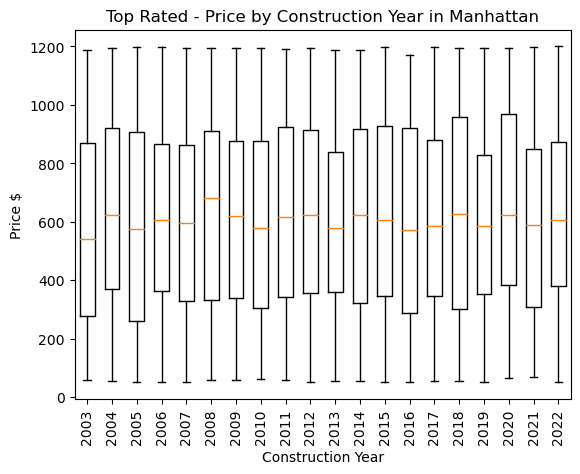

In [12]:
# Top Rated - Price by Construction Year

# Defining the Variables
t= "neighbourhood group"
u = "Manhattan"
v = "review rate number"
w = 5
x = "Construction year"
y = "price"

# Making Summary Statistics Table and BoxPlots utilizing makebp_4var_sl function
makebp_4var_sl(t,u,v,w,x,y)
plt.ylabel("Price $")
plt.xlabel("Construction Year")
plt.xticks(rotation=90)
plt.title("Top Rated - Price by Construction Year in Manhattan")

,Property Count,Median,Mean,Minimum,Maximum
Construction year,,,,,
2003,4095,626,623,50,1200
2004,4035,643,633,50,1199
2005,4103,626,623,50,1200
2006,4208,630,630,50,1199
2007,4074,633,630,50,1200
2008,4218,638,639,50,1200
2009,4120,627,622,50,1200
2010,4120,615,620,50,1200
2011,4064,632,634,50,1200


Text(0.5, 1.0, 'Price by Construction Year')

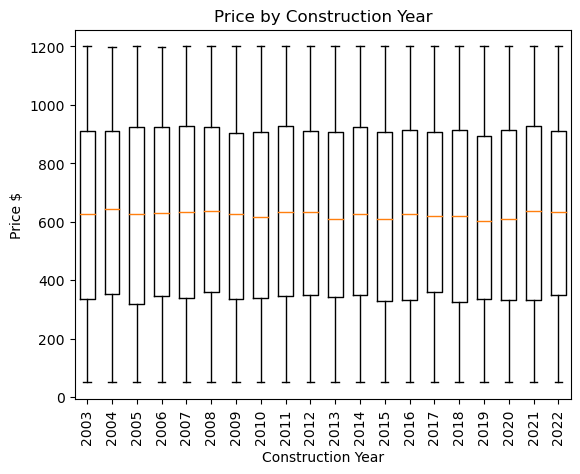

In [13]:
# Defining the Variables
x = 'Construction year'
y = 'price'

# Making Summary Statistics Table and BoxPlots utilizing makebp_sl function
makebp_sl(x,y)
plt.ylabel("Price $")
plt.xlabel("Construction Year")
plt.xticks(rotation=90)
plt.title("Price by Construction Year")

,Property Count,Median,Mean,Minimum,Maximum
room type,,,,,
Entire home/apt,43335,625,625,50,1200
Hotel room,113,643,668,50,1193
Private room,37023,626,627,50,1200
Shared room,1635,656,629,50,1199


Text(0.5, 1.0, 'Price by Room Type')

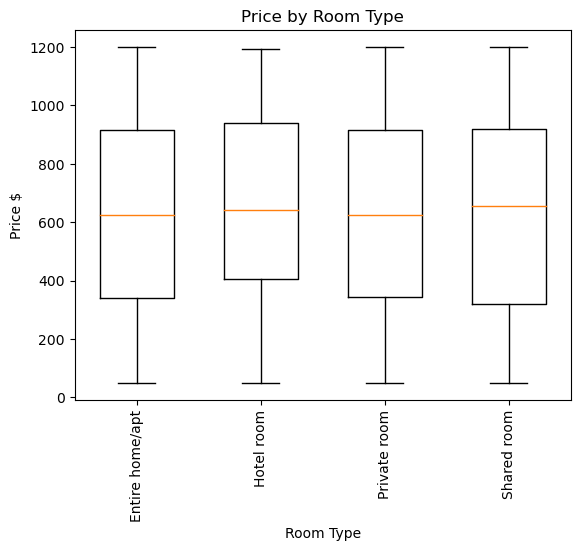

In [14]:
# Price by Room Type

# Defining the Variables
x = 'room type'
y = 'price'

# Making Summary Statistics Table and BoxPlots utilizing makebp_sl function
makebp_sl(x,y)
plt.ylabel("Price $")
plt.xlabel("Room Type")
plt.xticks(rotation=90)
plt.title("Price by Room Type")

,Property Count,Median,Mean,Minimum,Maximum
room type,,,,,
Entire home/apt,4640,598,611,50,1200
Hotel room,27,703,694,286,1149
Private room,2980,618,613,50,1199
Shared room,141,624,616,51,1194


Text(0.5, 1.0, 'Price by Room Type for Properties Rated at 5 (Best) in Manhattan')

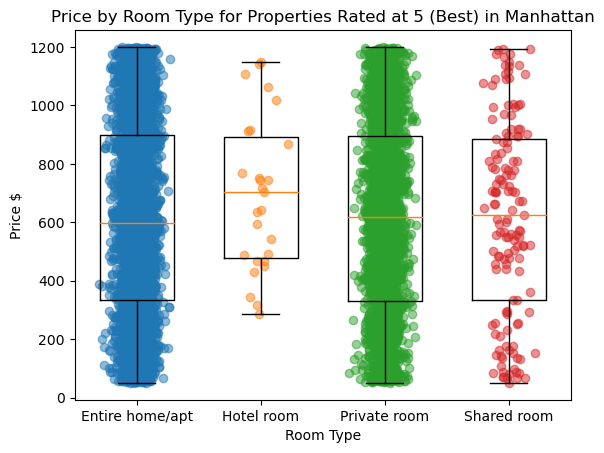

In [15]:
# Best Rated - Price by Room Type

# Defining the Variables
t= "neighbourhood group"
u = "Manhattan"
v = 'review rate number'
w = 5
x = 'room type'
y = 'price'

# Making Summary Statistics Table and BoxPlots utilizing makebp_4var function
makebp_4var_scatter_sl(t,u,v, w, x, y)
plt.ylabel("Price $")
plt.xlabel("Room Type")
plt.title("Price by Room Type for Properties Rated at 5 (Best) in Manhattan")

,Property Count,Median,Mean,Minimum,Maximum
room type,,,,,
Entire home/apt,1798,637,629,50,1200
Hotel room,0,0,0,0,0
Private room,1148,645,638,52,1195
Shared room,48,822,733,85,1199


Text(0.5, 1.0, 'Price by Room Type for Properties Rated at 1 (Worst) in Manhattan')

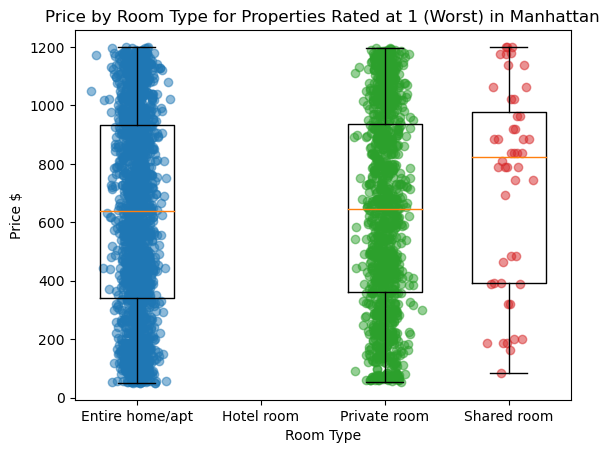

In [16]:
# Price by Room Type with Rating 1

# Defining the Variables
t= "neighbourhood group"
u = "Manhattan"
v = 'review rate number'
w = 1
x = 'room type'
y = 'price'

# Making Summary Statistics Table and BoxPlots utilizing makebp_4var function
makebp_4var_scatter_sl(t,u,v, w, x, y)
plt.ylabel("Price $")
plt.xlabel("Room Type")
plt.title("Price by Room Type for Properties Rated at 1 (Worst) in Manhattan")

In [17]:
# remove rows with service fee at zero
airbnb_df_sl2 = airbnb_df_sl.loc[airbnb_df_sl['service fee'] >0,:]
airbnb_df_sl2.reset_index(drop=True)
airbnb_df_sl2.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4,1.0,322.0,NaN,NaN
3,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
4,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,212.0,45.0,49.0,2017-10-05,0.40,5,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN


In [18]:
# Defining a linear regression function and scatter plot

def lin_reg_sl(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_value = x * slope + intercept
    line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    yplacement = y.max()-((y.max()-y.min())/10)
    xplacement = x.min()+((x.max()-x.min())/10)
    return plt.scatter(x,y,alpha=0.5),plt.plot(x, regress_value, "r-"), plt.annotate(line_eq, (xplacement,yplacement), fontsize=12, color='red', weight='bold'), print(f'The r-value is: {rvalue}')
    

The r-value is: 0.9999908975794347


Text(0.5, 1.0, 'Service Fee vs Price')

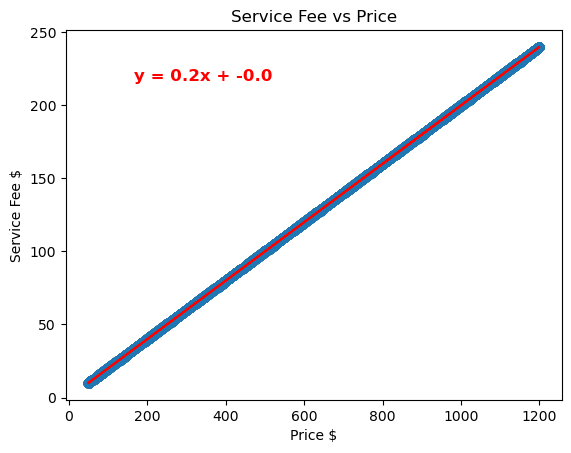

In [19]:
# Service fee by Price Scatter Plot

# Defining the Variables
x = airbnb_df_sl2["price"]
y = airbnb_df_sl2['service fee']

# Scatter plot and linear regression
lin_reg_sl(x,y)
plt.xlabel("Price $")
plt.ylabel("Service Fee $")
plt.title("Service Fee vs Price")

,Property Count,Median,Mean,Minimum,Maximum
room type,,,,,
Entire home/apt,496,579,600,50,1191
Hotel room,3,643,612,451,744
Private room,330,547,575,52,1196
Shared room,22,648,640,67,1090


<function matplotlib.pyplot.show(close=None, block=None)>

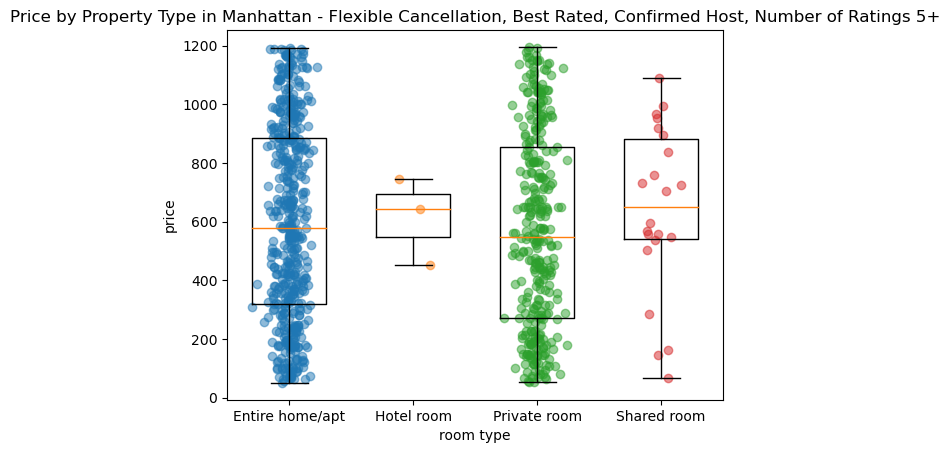

In [20]:
# Defining a function to create a boxplot and summary statistics DataFrame based on three columns and one variable with added Scatter plot
    # Setting up an empty list that will hold the loc data
bp_data_sl = []
    
    # Defining what values will be used to define the boxplot on x-axis
categories_sl = airbnb_df_sl["room type"].unique()
categories_sorted_sl = np.sort(categories_sl)
    
    # Setting up empty lists for summary statistics
num_sl = len(categories_sorted_sl)
length_list_sl = []
median_list_sl = []
mean_list_sl = []
min_list_sl = []
max_list_sl = []
    
    # Finding the data according to x and y variables, and appending to bp_data
for z in range(num_sl):
    category_data_sl = airbnb_df_sl.loc[(airbnb_df_sl["room type"] == categories_sorted_sl[z]) & 
                                        (airbnb_df_sl["host_identity_verified"] == "verified") &
                                        (airbnb_df_sl["cancellation_policy"] == "flexible") &
                                        (airbnb_df_sl["review rate number"] == 5) &
                                        (airbnb_df_sl['number of reviews'] > 4) &
                                        (airbnb_df_sl['neighbourhood group'] == "Manhattan"),['price']]
    bp_data_sl.append(category_data_sl)
        
        # Determining how many values per x-axis category
    length_sl = int(bp_data_sl[z].count())
    length_list_sl.append(length_sl)
        
        # If there are found values, they will be used for summary statistics calculations
    if length_sl > 0:
        median_sl = int(bp_data_sl[z].median())    
        mean_sl = int(bp_data_sl[z].mean())
        mini_sl = int(bp_data_sl[z].min())
        maxi_sl = int(bp_data_sl[z].max())
        
        # If there are no values for the category, statistics will be set to 0
    else:
        median_sl = 0
        mean_sl = 0
        mini_sl=0
        maxi_sl=0
            
        # Adding the summary statistics into lists    
    median_list_sl.append(median_sl)
    mean_list_sl.append(mean_sl)
    min_list_sl.append(mini_sl)
    max_list_sl.append(maxi_sl)
    
    # Making summary statistics DataFrame and setting index label    
summary_df_sl = pd.DataFrame({"Property Count":length_list_sl, "Median": median_list_sl, 
                               "Mean":mean_list_sl, "Minimum":min_list_sl, "Maximum":max_list_sl})
summary_df_sl.index = [categories_sorted_sl]
summary_df_sl = summary_df_sl.rename_axis('room type')
display(summary_df_sl)
    
    # Plotting boxplot and scatter
j=1
for k in range(num_sl):
    y_val_sl = bp_data_sl[k]
        
        # Setting variable for scatter plot overlay
    x_val_sl = np.random.normal(k + 1, 0.08, len(y_val_sl))
        
        # Making boxplots with scatter overlay
    plt.boxplot(y_val_sl, positions=[j], widths=0.6)
    plt.scatter(x_val_sl,y_val_sl, alpha=0.5)
        
        #Sets position for next boxplot
    j=j+1
plt.ylabel("price")
plt.xlabel("room type")
x_axis = np.arange(1,(num_sl+1),1)
plt.xticks(x_axis, categories_sorted_sl)
plt.title("Price by Property Type in Manhattan - Flexible Cancellation, Best Rated, Confirmed Host, Number of Ratings 5+")
plt.show


# Whole Population Data Overview

Text(0.5, 1.0, 'Property Distribution in AirBnB Dataset')

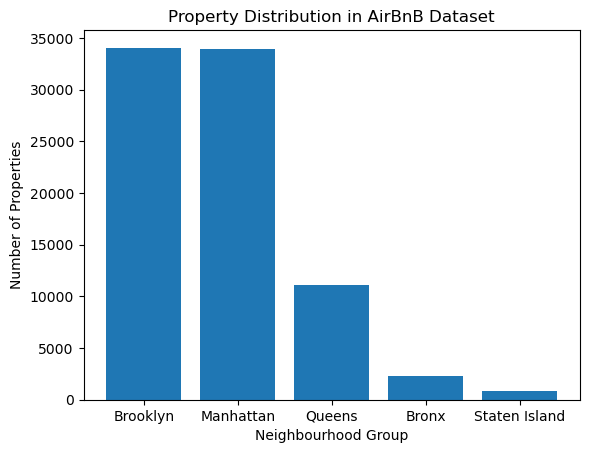

In [21]:
# Count of Number of Properties in Each Neighbourhood Group
neighbour_group_df_sl = airbnb_df_sl.groupby(['neighbourhood group'])
neighbour_gr_bar_data = neighbour_group_df_sl["price"].count()
neighbour_gr_bar_data = neighbour_gr_bar_data.sort_values(ascending=False)

x = neighbour_gr_bar_data.index.to_list()
y = neighbour_gr_bar_data.to_list()
plt.bar(x,y)
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Properties")
plt.title("Property Distribution in AirBnB Dataset")

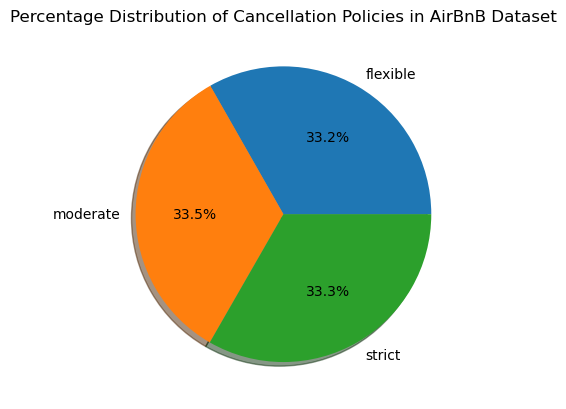

In [22]:
# Count by cancellation policy
# Groupby Cancellation, perform count on column, make into a list for plotting

cancel_group_sl = airbnb_df_sl.groupby(['cancellation_policy'])
cancel_bar_data_sl = cancel_group_sl["price"].count()
x = cancel_bar_data_sl.index.to_list()
y = cancel_bar_data_sl.to_list()
plt.pie(y, labels = x, autopct="%1.1f%%", shadow=True)
plt.title("Percentage Distribution of Cancellation Policies in AirBnB Dataset")
plt.show()

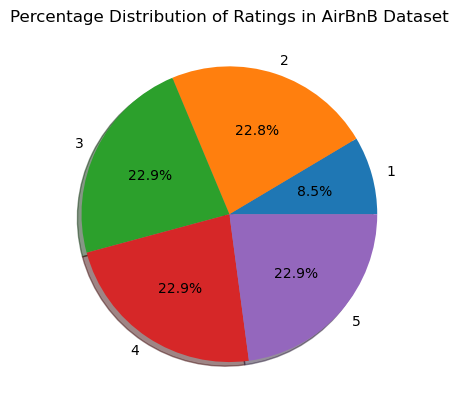

In [23]:
# Visualizing Number of Ratings for Rating Number
# Grouping by rating, count on column, putting data into a list for plotting

rating_group_sl = airbnb_df_sl.groupby(['review rate number'])
rating_gr_bar_sl = rating_group_sl["price"].count()

x = rating_gr_bar_sl.index.to_list()
y = rating_gr_bar_sl.to_list()
plt.pie(y, labels = x, autopct="%1.1f%%", shadow=True)
plt.title("Percentage Distribution of Ratings in AirBnB Dataset")
plt.show()

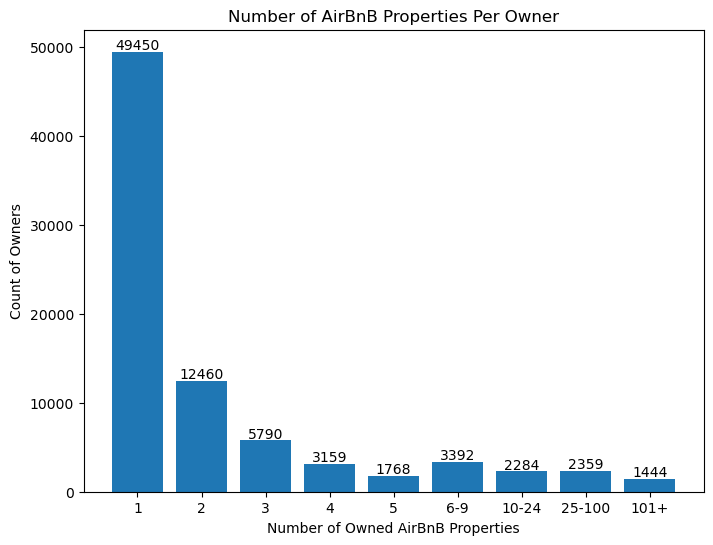

In [24]:
# AirBnB as a business
# Visualizing how many owners have multiple AirBnB properties by ranges of number of properties
#airbnb_df_sl["calculated host listings count"] = pd.to_numeric(airbnb_df_sl["calculated host listings count"])

# Define Bins and Labels
bins = [0,1,2,3,4,5,9,24,100,1000]
group_names = ['1', '2', '3', '4', '5','6-9', '10-24', '25-100', '101+']

# Binning based on "host listings count"
binned_listcount_sl = airbnb_df_sl
binned_listcount_sl["calculated host listings count"] = pd.cut(binned_listcount_sl["calculated host listings count"], bins, labels=group_names, include_lowest=True)

# Groupby binned 'calculated host listing count' and determining count within the bins
group_bin = binned_listcount_sl.groupby(['calculated host listings count'])
group_bin_bar_data = group_bin["price"].count()

plt.figure(figsize=(8,6))
x = group_bin_bar_data.index.to_list()
y = group_bin_bar_data.to_list()
plt.bar(x,y)
plt.xlabel('Number of Owned AirBnB Properties')
plt.ylabel('Count of Owners')
plt.title('Number of AirBnB Properties Per Owner')
for i in range(0,len(group_bin_bar_data.index)):
    plt.text(i,(group_bin_bar_data[i]+250),group_bin_bar_data[i], ha='center')
    